# Trabajo práctico 

Nombres de integrantes/padron:

In [63]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



##  Análisis de columnas

#### Se hace un pequeño análisis global del dataset.

In [67]:
#Ante todo, empezamos a analizar la información brindada por los datasets y sus respectivas columnas.
sells = pd.read_csv('data/properati-AR-2017-01-01-properties-sell.csv')
sells.columns.values

array(['id', 'created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'], dtype=object)

In [68]:
#Se analizan las columnas que consideramos necesarias para nuestro analisis exploratorio.
#Con esto borro las columnas del dataframe que no aporten algún valor significativo a nuestro entender (id, operation, place_with_parents_name, country_name, geonames_id(ver si sirve)
# lat-lon, price_aprox_local_currency, price_usd_per_m2, price_per_m2, floor, description, title, image_thumbnail)
sells = sells.drop(sells.columns[[0, 2, 5, 6, 8, 9, 14, 19, 20, 24, 25, 26]], axis=1)

Se van eliminando algunas columnas que a nuestro entender no agregan información relevante para el estudio.

In [69]:
#Vericamos las columnas restantes a analizar.
sells.columns.values

array(['created_on', 'property_type', 'place_name', 'state_name', 'lat',
       'lon', 'price', 'currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'rooms', 'expenses', 'properati_url'], dtype=object)

In [70]:
#Mirada global del dataframe resultante.
sells.head(10)

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,expenses,properati_url
0,2016-07-01,house,Esperanza,Santa Fe,NaN,NaN,2500000,ARS,157475.35,NaN,20,NaN,NaN,NaN,http://www.properati.com.ar/zo0f_venta_casa_sa...
1,2016-07-01,apartment,Barrio Norte,Capital Federal,-34.592891,-58.408693,380000,USD,380000.00,NaN,180,NaN,4,NaN,http://www.properati.com.ar/zo17_venta_departa...
2,2016-07-01,house,Mar del Plata,Buenos Aires Costa Atlántica,-38.110520,-57.620872,NaN,NaN,NaN,787,260,NaN,5,NaN,http://www.properati.com.ar/zo1e_venta_casa_ma...
3,2016-07-01,house,Zárate,Buenos Aires Interior,NaN,NaN,195000,USD,195000.00,NaN,20,NaN,NaN,NaN,http://www.properati.com.ar/zo1k_venta_casa_za...
4,2016-07-01,house,Zárate,Buenos Aires Interior,NaN,NaN,135000,USD,135000.00,NaN,166,NaN,NaN,NaN,http://www.properati.com.ar/zo1l_venta_casa_za...
5,2016-07-01,PH,Manuel B Gonnet,Bs.As. G.B.A. Zona Sur,-34.898361,-58.008188,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,http://www.properati.com.ar/zo25_venta_ph_la-p...
6,2016-07-01,house,City Bell,Bs.As. G.B.A. Zona Sur,-34.877834,-58.083429,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,http://www.properati.com.ar/zo27_venta_casa_la...
7,2016-07-01,apartment,Rosario,Santa Fe,-32.954717,-60.643063,1122000,ARS,70674.93,NaN,48,NaN,NaN,NaN,http://www.properati.com.ar/zo3c_venta_departa...
8,2016-07-01,apartment,Rosario,Santa Fe,-32.954717,-60.643063,840000,ARS,52911.71,NaN,37,NaN,NaN,NaN,http://www.properati.com.ar/zo3d_venta_departa...
9,2016-07-01,apartment,Rosario,Santa Fe,-32.954717,-60.643063,1116000,ARS,70296.99,NaN,48,NaN,NaN,NaN,http://www.properati.com.ar/zo3f_venta_departa...


In [71]:
#Se empieza por analizar la columna donde se encuentra el lugar de la publicación.
#uso regex para buscar coincidencias por string por Capital Federal y se hace un count para consistencias de datos. 
sells_caba = sells.loc[sells['state_name'].str.contains(r'(Capital Federal|capital federal)')]
sells_caba.count()

/home/braian/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


created_on               16238
property_type            16238
place_name               16238
state_name               16238
lat                      14990
lon                      14990
price                    15232
currency                 15005
price_aprox_usd          15232
surface_total_in_m2      13260
surface_covered_in_m2    15469
price_usd_per_m2         12026
rooms                    12406
expenses                  3120
properati_url            16238
dtype: int64

In [72]:
#filtro barrio Capital Federal de caba (se analiza de forma aparte)
sells_caba = sells_caba[sells_caba['place_name']!='Capital Federal']
sells_caba.count()

created_on               15621
property_type            15621
place_name               15621
state_name               15621
lat                      14845
lon                      14845
price                    14662
currency                 14444
price_aprox_usd          14662
surface_total_in_m2      12795
surface_covered_in_m2    14883
price_usd_per_m2         11572
rooms                    12267
expenses                  3099
properati_url            15621
dtype: int64

In [73]:
#Uso regex para buscar coincidencias por string entre diferentes zonas del Gran Buenos Aires y las agrupo.
#Se hace un count para consistencias de datos.
sells_gba = sells.loc[sells['state_name'].str.contains(r'(G.B.A|Zona Norte|Zona Sur|Zona Este|Zona Oeste)')]
sells_gba.count()

/home/braian/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


created_on               24901
property_type            24901
place_name               24893
state_name               24901
lat                      17613
lon                      17613
price                    22863
currency                 22387
price_aprox_usd          22863
surface_total_in_m2      18541
surface_covered_in_m2    21302
price_usd_per_m2         15864
rooms                    12381
expenses                  1680
properati_url            24901
dtype: int64

### Se observa el enfoque en particular que tiene el dataframe.

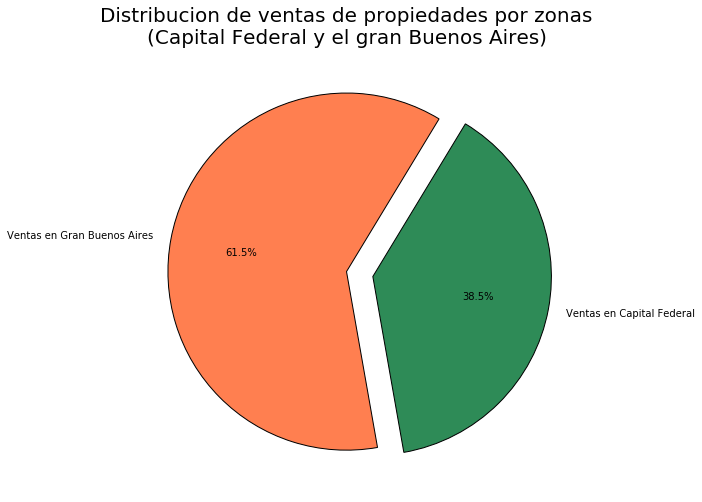

In [74]:
#Distribución de ventas agrupadas por las zonas de Capital Federal y el Gran Buenos Aires.

ventas_en_caba = sells_caba['state_name'].value_counts()
ventas_en_gba = sells_gba['state_name'].value_counts().sum()
sizes = (ventas_en_caba,ventas_en_gba)
ventas_en_gba
nombres_de_parametros = ['Ventas en Capital Federal', 'Ventas en Gran Buenos Aires']

plt.figure(figsize=(8, 8))
plt.title('Distribucion de ventas de propiedades por zonas\n(Capital Federal y el gran Buenos Aires)', fontsize=20)
plt.pie(sizes, labels=nombres_de_parametros, autopct='%1.1f%%', startangle=1000
    , colors=['seagreen', 'coral'], explode=(0.15, 0))
plt.show()

Con este plot, se puede ver que el dataframe tiene un enfoque particular en ventas que se centra en zonas aledañas a Capital Federal.

### Primeros trabajos sobre propiedades en Capital Federal.

In [75]:

#Obtengo del dataframe de Capital Federal las columnas 'state_name', 'place_name' y 'price_aprox_usd'.
#Muestra un random de 10 publicaciones.
sells_caba_price = sells_caba.loc[:,['state_name','place_name','price_aprox_usd']]
sells_caba_price.head(10)

,state_name,place_name,price_aprox_usd
1,Capital Federal,Barrio Norte,380000
27,Capital Federal,Flores,130000
31,Capital Federal,Puerto Madero,1050000
39,Capital Federal,Belgrano,158000
41,Capital Federal,Villa Crespo,136000
42,Capital Federal,Villa Crespo,123000
43,Capital Federal,Villa Crespo,136000
44,Capital Federal,Villa Crespo,109500
45,Capital Federal,Villa Crespo,136000
46,Capital Federal,Villa Crespo,108000


In [76]:
#Agrupo las columnas filtradas por lugar y promedio el precio de las propiedades.
sells_caba_group = sells_caba_price.groupby('place_name')
sells_caba_group.mean()

,price_aprox_usd
place_name,
Abasto,132100.457021
Agronomía,156624.075556
Almagro,153975.440750
Balvanera,189106.813073
Barracas,224497.023858
Barrio Norte,337737.943203
Belgrano,427292.941523
Boca,166971.904623
Boedo,161400.341574


### Cantidad de ventas de propiedades por barrios de Capital Federal.

In [77]:
#Defino cantidad de ventas por barrio y ordeno de mayor a menor.
sells_caba_group_count = sells_caba_group.count()['state_name']
sells_caba_group_count.sort_values(ascending=False)

place_name
Palermo                  1452
Belgrano                 1260
Caballito                 989
Villa Crespo              806
Recoleta                  793
Barrio Norte              753
Almagro                   642
Villa Urquiza             619
Puerto Madero             563
Flores                    532
Balvanera                 439
San Telmo                 396
Nuñez                     369
Saavedra                  292
Floresta                  272
Barracas                  259
Villa Devoto              246
Palermo Hollywood         244
Mataderos                 238
San Cristobal             234
Monserrat                 232
Centro / Microcentro      220
Congreso                  209
Boedo                     200
Colegiales                192
Villa del Parque          181
Villa Luro                177
Retiro                    171
Once                      170
Liniers                   162
                         ... 
Paternal                  142
Palermo Chico             137

Con el conteo de ventas por barrios, se puede observar que Palermo,Belgrano y Caballito son las zonas con más ventas de Capital Federal.
Por otro lado, Las zonas como Villa Soldati, Villa Riachuelo y Villa Real son los barrios con menos ventas.

In [78]:
#Para tener consistencias en los datos, se decide filtrar los contenidos por un mínimo de ventas por barrio para empezar 
#a analizar.
#como hay min 2 cantidad de ventas y max 1872, filtro por >= 15
sells_caba_group = sells_caba_price.groupby('place_name').agg([np.mean,np.size])
sells_caba_group = sells_caba_group.loc[sells_caba_group[('price_aprox_usd','size')]>=15,:]   
sells_caba_group.head()

price_aprox_usd     
                      mean size
place_name                     
Abasto       132100.457021   56
Agronomía    156624.075556   54
Almagro      153975.440750  642
Balvanera    189106.813073  439
Barracas     224497.023858  259

### Precio en dólares promedio de una propiedad por barrio en Capital Federal.

#### Precios promedio más altos de Capital Federal.


In [79]:
#top 10 CABA promedio de precios en Capital Federal.


sells_caba_sort_desc = sells_caba_group.sort_values(('price_aprox_usd','mean'), ascending=False)
sells_caba_sort_desc.head(10)


price_aprox_usd      
                         mean  size
place_name                         
Palermo Chico  1003620.608333   137
Puerto Madero   895455.778308   563
Retiro          586298.263006   171
Palermo Viejo   479293.034483    39
Recoleta        476663.885724   793
Belgrano        427292.941523  1260
Palermo Soho    361522.243697   126
Palermo         341307.445469  1452
Barrio Norte    337737.943203   753
Las Cañitas     326175.126050   126

Claramente, las zonas de Palermo Chico y Puerto Madero son las zonas donde el precio en promedio, dominan en Capital Federal como las zonas promedios más caras de Capital Federal.

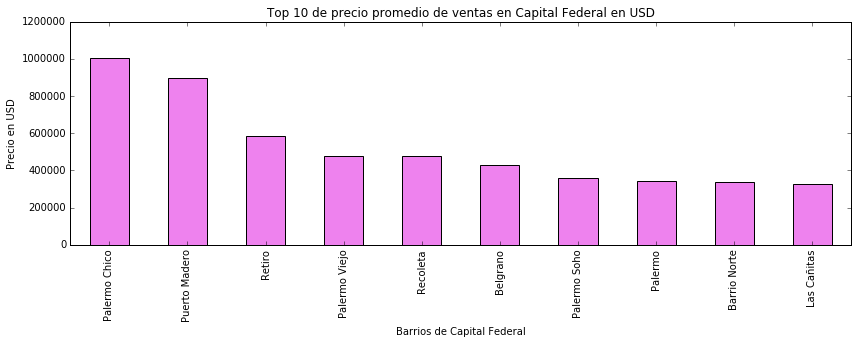

In [80]:
#Visualizacion de precios promedios de los 10 barrios con mayor valor.

plt.ylabel = "1"
ax = sells_caba_sort_desc[('price_aprox_usd','mean')][0:10].plot(title = "Top 10 de precio promedio de ventas en Capital Federal en USD",kind='bar',figsize=(14,4),color= "violet")
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Barrios de Capital Federal')
plt.show()

Con el plot, se ve la gran diferencia de precios promedio entre los barrios de Palermo Chico y Puerto Madero con respecto a los demás barrios que integran el top10 de las zonas más caras.

####  Precios promedio más bajos de Capital Federal.

In [81]:
#top 10 CABA promedio de precios más bajos en Capital Federal por barrio.

sells_caba_sort_asc = sells_caba_group.sort_values(('price_aprox_usd','mean'), ascending=True)
sells_caba_sort_asc.head(10)

price_aprox_usd     
                             mean size
place_name                            
Villa Soldati        76159.928667   15
Pompeya              97743.090588   18
Parque Chas         125591.304348   27
Villa Lugano        131717.045455   97
Abasto              132100.457021   56
Constitución        135298.518519  113
Villa Ortuzar       138749.019608   53
Villa Pueyrredón    141337.798571   99
Parque Avellaneda   143523.076923   66
Liniers             145012.639935  162

Se puede observar que las zonas de Villa Soldati, Constitución y Villa Riachuelo tienen los precios más bajos
en promedio con los demás barrios.

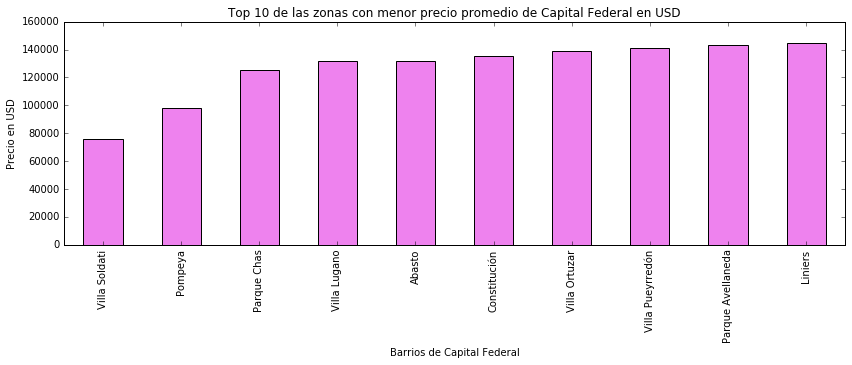

In [82]:
#Visualizacion de precios promedios de los 10 barrios con menor valor.
#Villa Soldati es el barrio con menor precio promedio con respecto a los demás barrios de Capital Federal.

plt.ylabel = "1"
ax = sells_caba_sort_asc[('price_aprox_usd','mean')][0:10].plot(title = "Top 10 de las zonas con menor precio promedio de Capital Federal en USD",color = 'violet',kind='bar',figsize=(14,4))
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Barrios de Capital Federal')
plt.show()

Así como Puerto Madero y Palermo Chico mostraban una diferencia de precios muy marcada con los inmediatos seguidores,
en este plot, se puede observar que Villa Soldati se encuentra como la zona de menor precio promedio de Capital Federal, seguidas de Constitución y Villa Riachuelo.

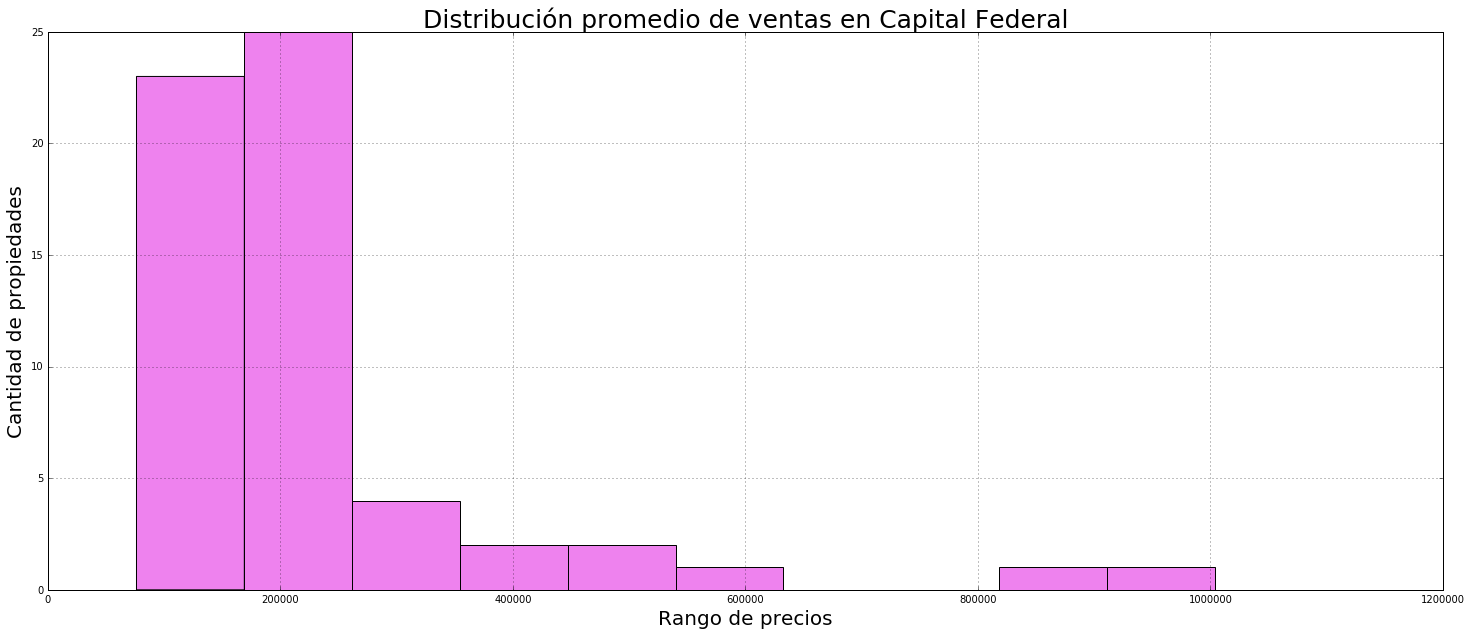

In [241]:
# Histograma de cantidad de promedio de precios y cantidad de ventas
ax = sells_caba_group[('price_aprox_usd','mean')].hist(figsize=(25,10),color = 'violet');
ax.set_ylabel('Cantidad de propiedades',fontsize=20)
ax.set_xlabel('Rango de precios',fontsize=20)
ax.set_title("Distribución promedio de ventas en Capital Federal",fontsize = 25)
plt.show()

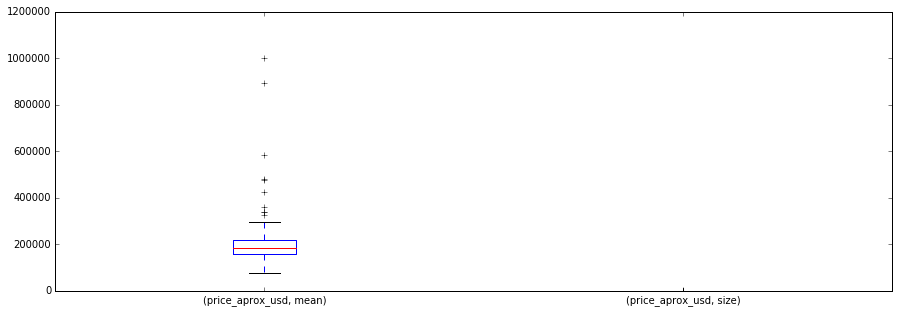

In [84]:
######################VERRRRR###########################3

#concentracion de precios y cantidad de ventas
sells_caba_group.plot.box(figsize=(15,5));

### Primeros trabajos sobre propiedades en Capital Federal.

In [85]:
sells_gba_price = sells_gba.loc[:,['state_name','place_name','price_aprox_usd']]
sells_gba_price.head(10)

,state_name,place_name,price_aprox_usd
5,Bs.As. G.B.A. Zona Sur,Manuel B Gonnet,NaN
6,Bs.As. G.B.A. Zona Sur,City Bell,NaN
12,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,90000
13,Bs.As. G.B.A. Zona Sur,Banfield,82000
14,Bs.As. G.B.A. Zona Oeste,San Justo,280000
15,Bs.As. G.B.A. Zona Oeste,San Justo,145000
16,Bs.As. G.B.A. Zona Oeste,San Justo,93000
17,Bs.As. G.B.A. Zona Oeste,San Justo,93000
18,Bs.As. G.B.A. Zona Oeste,San Justo,93000
19,Bs.As. G.B.A. Zona Oeste,San Justo,93000


In [86]:
sells_gba_group = sells_gba_price.groupby("place_name")
sells_gba_group.mean()

,price_aprox_usd
place_name,
Country Maschwitz Club,202000.000000
Abasto,65000.000000
Abril Club de Campo,1030333.333333
Acacias Blancas,237136.363636
Acassuso,629462.467059
Adrogué,263216.304671
Aero Country Club,126500.000000
Aeropuerto Internacional Ezeiza,262500.000000
Albanueva Barrio Cerrado,945400.000000


#### Cantidad de ventas de propiedades por barrio en el Gran Buenos Aires.

In [87]:
#defino cantidad de ventas por barrio
sells_gba_group_count = sells_gba_group.count()['state_name']
sells_gba_group_count.sort_values(ascending=False)

place_name
Nordelta                                     1859
Tigre                                        1544
Ramos Mejía                                  1143
Pilar                                        1088
La Plata                                      974
Olivos                                        827
Ituzaingó                                     679
Martínez                                      652
Morón                                         617
San Isidro                                    599
San Miguel                                    589
Benavidez                                     588
Quilmes                                       558
Vicente López                                 501
Haedo                                         382
Caseros                                       382
Castelar                                      372
San Fernando                                  361
San Martín                                    324
Escobar                                

Como primera observación realizada, Nordelta, Tigre, La Plata y Pilar dominan ampliamante el sector de ventas de las zonas de Gran Capital, y su vez, el dataframe nos informa de muchas ventas unitarias de diferentes barrios.

In [88]:
#como hay min 2 cantidad de ventas y max 2238, filtro por >= 15
sells_gba_group = sells_gba_price.groupby('place_name').agg([np.mean,np.size])
sells_gba_group = sells_gba_group.loc[sells_gba_group[('price_aprox_usd','size')]>=15,:]   
sells_gba_group.head(100)

price_aprox_usd      
                                     mean  size
place_name                                     
Abril Club de Campo        1030333.333333    19
Acacias Blancas             237136.363636    22
Acassuso                    629462.467059   205
Adrogué                     263216.304671   154
Avellaneda                  134124.653544    81
Banfield                    166695.364238   155
Barrio El Golf              447596.584545    44
Barrio La Alameda           391437.500000    16
Barrio Los Alisos           384983.333333    36
Barrio Los Castores         830538.461538    26
Barrio Los Lagos            596824.242424    33
Barrio San Agustin          285700.000000    20
Barrio San Francisco        354960.000000    25
Barrio San Gabriel          335826.086957    46
Barrio Santa Teresa         396761.904762    21
BarrioPortezuelo            205081.081081    38
Beccar                      368683.002326   260
Bella Vista                 190442.501000   164
Belén de Escobar            179331.914655    62
Benavidez                   399149.961672   588
Berazategui                 307012.259263   117
Bermudas Country Club       139860.868421    38
Bernal                      182665.843033   135
Boulogne Sur Mer            225373.044111    90
Bs.As. G.B.A. Zona Norte    334328.658411   160
Bs.As. G.B.A. Zona Oeste    193202.458155   272
Burzaco                     125606.660152    66
Canning                     233802.002473    96
Carapachay                  190620.000000    50
Caseros                     105530.603750   382
...                                   ...   ...
La Comarca                  350400.000000    15
La Lucila                   444961.569770   175
La Matanza                  249897.805325   103
La Plata                     97682.693449   974
La Reja                     103615.114400    27
La Tablada                  134133.333333    31
Lanús                       134799.523526   160
Lanús Este                  164146.768621   150
Lanús Oeste                 159033.144754   190
Loma Verde                 2512795.454545    22
Lomas de Zamora             184748.777581   220
Lomas del Mirador           118628.667333   161
Longchamps                  131159.110000    28
Los Lagartos Country Club   362967.741935    31
Los Polvorines              250793.144333    62
Malvinas Argentinas         362264.705882    36
Manuel Alberti              261830.419375    16
Manuel B Gonnet             261714.285714    57
Manzanares                  205862.500000    16
Martín Coronado             120300.000000    31
Martínez                    440171.535707   652
Maschwitz                   252811.023622   127
Mayling Club de Campo       542352.941176    17
Merlo                       122190.162456    70
Monte Grande                135733.358167    69
Moreno                      184664.831203   186
Morón                       214020.008598   617
Munro                       146128.794471    85
Muñiz                       114076.112301   148
Nordelta                    421964.049544  1859

[100 rows x 2 columns]

In [89]:
#top 10 de los precios promedios más caros por Gran Bueno Aires
sells_gba_sort_desc = sells_gba_group.sort_values(('price_aprox_usd','mean'), ascending=False)
sells_gba_sort_desc.head(10)

price_aprox_usd     
                                        mean size
place_name                                       
Loma Verde                    2512795.454545   22
Abril Club de Campo           1030333.333333   19
Barrio Los Castores            830538.461538   26
Acassuso                       629462.467059  205
Santa Barbara Barrio Cerrado   612098.039216   53
Barrio Los Lagos               596824.242424   33
Mayling Club de Campo          542352.941176   17
Solares del Talar              509958.333333   24
Barrio El Golf                 447596.584545   44
La Lucila                      444961.569770  175

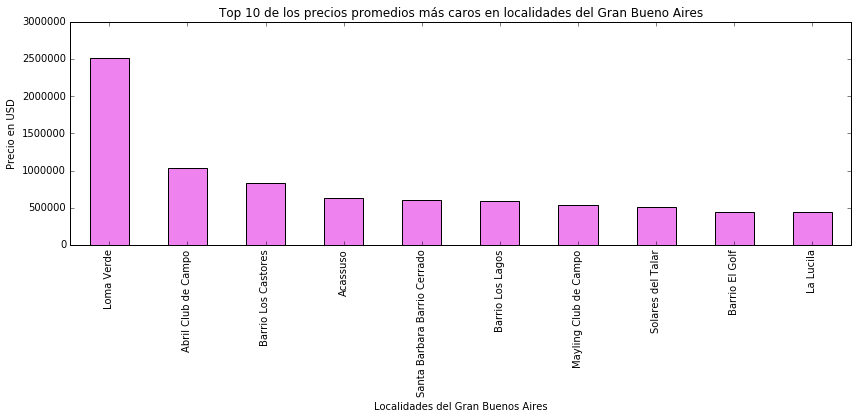

In [202]:
#top 10 GBA promedio
%matplotlib inline

plt.figure()
plt.ylabel = "1"
ax = sells_gba_sort_desc[('price_aprox_usd','mean')][0:10].plot(title = "Top 10 de los precios promedios más caros en localidades del Gran Bueno Aires",color= 'violet',kind='bar',figsize=(14,4))
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Localidades del Gran Buenos Aires')
plt.show()

In [194]:
#top 10 GBA promedio Ascendente
sells_gba_sort_asc = sells_gba_group.sort_values(('price_aprox_usd','mean'), ascending=True)
sells_gba_sort_asc.head(10)

price_aprox_usd     
                            mean size
place_name                           
Virrey del Pino     70512.050333   30
Florencio Varela    83500.000000   20
Villa Libertad      84342.193846   17
Paso del Rey        86573.243448   30
José C Paz          88500.753649   76
Tolosa              92725.629412   26
Ciudadela           93865.000000   81
Jose Leon Suarez    95745.714286   36
La Plata            97682.693449  974
Sarandi            101000.000000   15

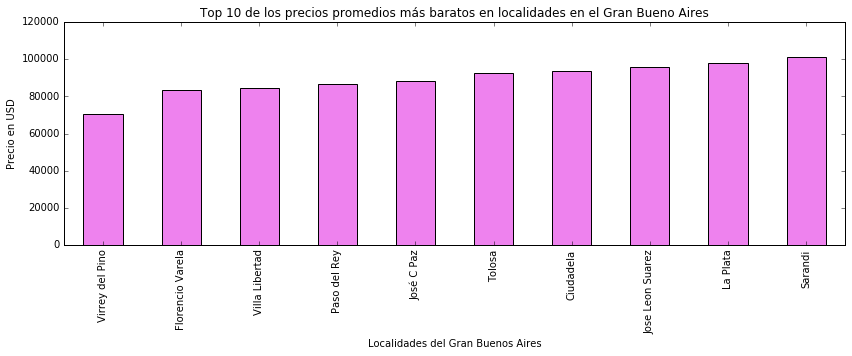

In [204]:
#top 10 GBA promedio Ascendente
plt.figure()
plt.ylabel = "1"
ax = sells_gba_sort_asc[('price_aprox_usd','mean')][0:10].plot(title = "Top 10 de los precios promedios más baratos en localidades en el Gran Bueno Aires",color = 'violet',kind='bar',figsize=(14,4))
ax.set_ylabel('Precio en USD')
ax.set_xlabel('Localidades del Gran Buenos Aires')

plt.show()

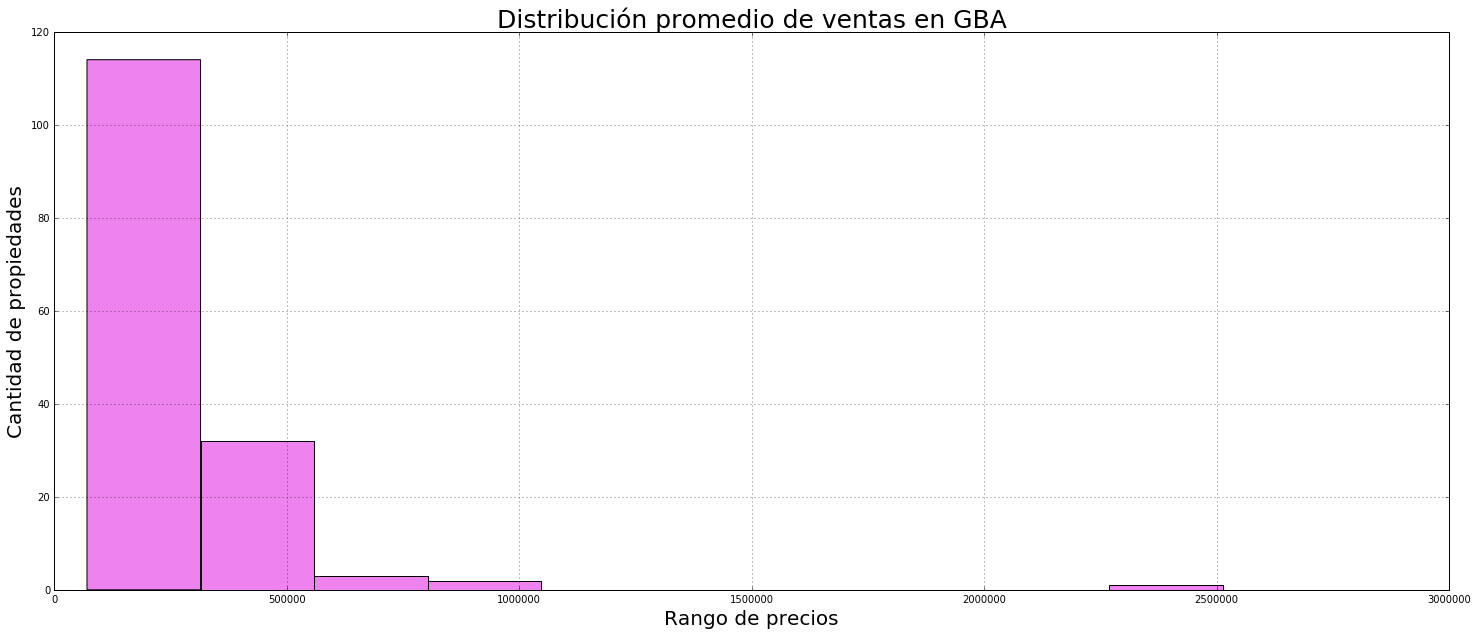

In [242]:
# Histograma de cantidad de promedio de precios y cantidad de ventas
#sells_gba_group['price_aprox_usd'].hist(figsize=(16,8));
ax = sells_gba_group[('price_aprox_usd','mean')].hist(figsize=(25,10),color = 'violet');
ax.set_ylabel('Cantidad de propiedades',fontsize=20)
ax.set_xlabel('Rango de precios',fontsize=20)
ax.set_title("Distribución promedio de ventas en GBA",fontsize = 25)
plt.show()

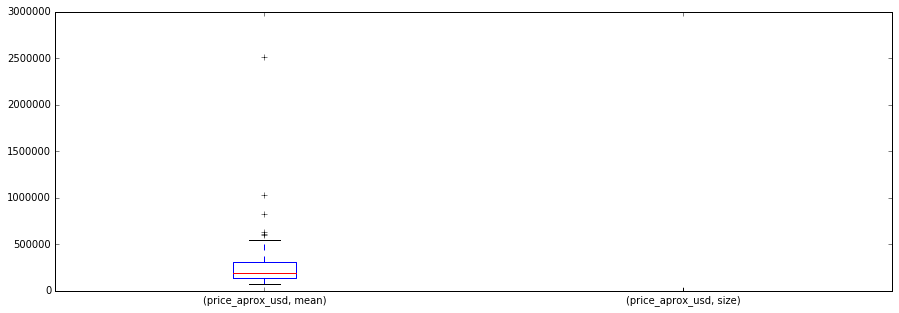

In [96]:
#concentracion de promedio precios y cantidad de ventas
sells_gba_group.plot.box(figsize=(15,5));

In [97]:
#cantidad ventas de tipo de propiedades en CABA
sells_caba_property = sells_caba.loc[:,['property_type','place_name']]
sells_caba_property.head(10)

,property_type,place_name
1,apartment,Barrio Norte
27,apartment,Flores
31,apartment,Puerto Madero
39,apartment,Belgrano
41,apartment,Villa Crespo
42,apartment,Villa Crespo
43,apartment,Villa Crespo
44,apartment,Villa Crespo
45,apartment,Villa Crespo
46,apartment,Villa Crespo


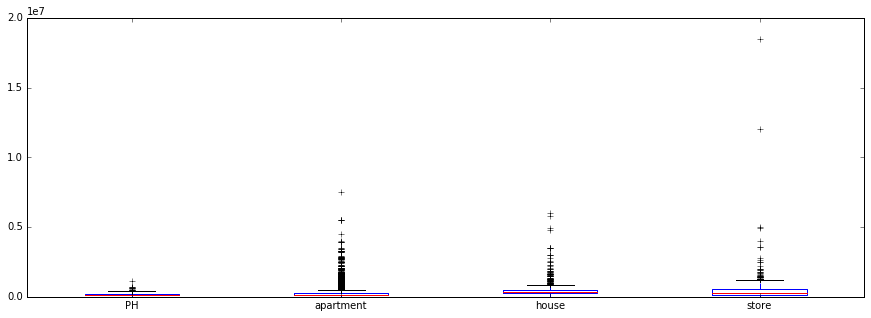

In [322]:
sells_caba_property = sells_caba.loc[:,['property_type','price_aprox_usd']]
sells_caba_property = sells_caba_property[np.isfinite(sells_caba_property['price_aprox_usd'])]
sells_caba_property['sub_index'] = sells_caba_property.groupby('property_type').cumcount() + 1
sells_caba_property = pd.pivot_table(sells_caba_property,index='sub_index',columns='property_type',values='price_aprox_usd')

sells_caba_property.plot.box(figsize=(15,5))

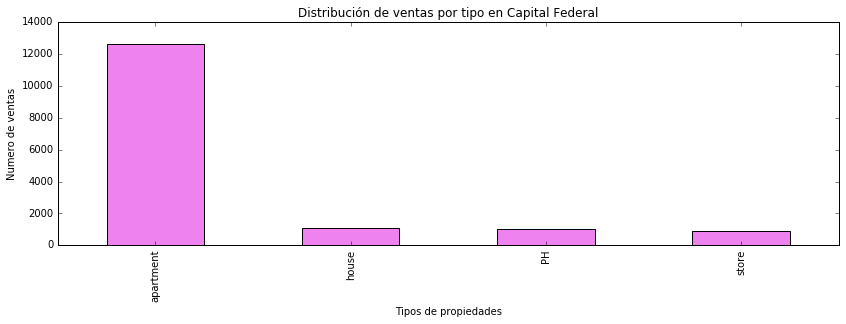

In [211]:
#cantidad de ventas por tipo de propiedades en CABA
ax = sells_caba_property_group_count[('place_name','size')][0:10].plot(title = "Distribución de ventas por tipo en Capital Federal",color = 'violet',kind='bar',figsize=(14,4))
ax.set_ylabel('Numero de ventas')
ax.set_xlabel('Tipos de propiedades')

plt.show()

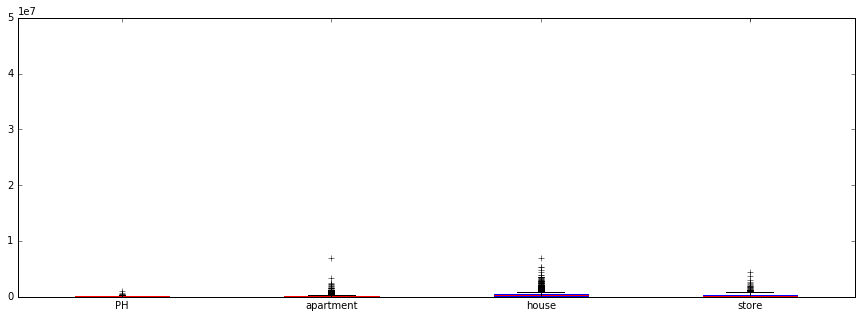

In [321]:
#cantidad ventas de tipo de propiedades en GBA
sells_gba_property = sells_gba.loc[:,['property_type','price_aprox_usd']]
sells_gba_property = sells_gba_property[np.isfinite(sells_gba_property['price_aprox_usd'])]
sells_gba_property['sub_index'] = sells_gba_property.groupby('property_type').cumcount() + 1
sells_gba_property = pd.pivot_table(sells_gba_property,index='sub_index',columns='property_type',values='price_aprox_usd')

sells_gba_property.plot.box(figsize=(15,5))

In [323]:
#cantidad de ventas por tipo de propiedades en GBA
ax = sells_gba_property_group_count[('place_name','size')][0:10].plot(title = "Distribución de ventas por tipo en el Gran Buenos Aires",color = 'violet',kind='bar',figsize=(14,4))
ax.set_ylabel('Número de ventas',fontsize=15)
ax.set_xlabel('Tipos de propiedades',fontsize=15)

plt.show()

IndexError: invalid index to scalar variable.

In [105]:
########################################################################################

In [106]:
#Cantidad promedio de habitaciones por propiedad vendida de CABA ordenada de mayor a menor.
sells_caba_rooms_place_name = sells_caba.loc[:,['place_name','rooms']]
sells_caba_rooms_place_name = sells_caba_rooms_place_name[np.isfinite(sells_caba_rooms_place_name['rooms'])]
sells_caba_rooms = sells_caba_rooms_place_name.groupby('place_name').agg([np.mean,np.size])
sells_caba_rooms = sells_caba_rooms.loc[sells_caba_rooms[('rooms','size')]>=5,:].rename(columns={'mean': 'promedio_de_habitacion'})
sells_caba_rooms.sort_values(('rooms','promedio_de_habitacion'), ascending=False).round({('rooms','promedio_de_habitacion'):2})

rooms      
                     promedio_de_habitacion  size
place_name                                       
Palermo Chico                          4.10   114
Retiro                                 3.94   145
Recoleta                               3.65   668
Velez Sarsfield                        3.56    16
Villa General Mitre                    3.54    26
Barrio Norte                           3.46   621
Versalles                              3.45    20
Tribunales                             3.41    22
Villa Soldati                          3.38    13
Villa Lugano                           3.36    67
Villa Real                             3.33    12
Once                                   3.30    99
Boca                                   3.27    93
Mataderos                              3.24   113
Puerto Madero                          3.21   510
Floresta                               3.13   189
Parque Chacabuco                       3.11    95
Belgrano                               3.07  1068
Balvanera                              3.03   294
Flores                                 3.03   401
Villa Devoto                           3.03   173
Parque Avellaneda                      3.02    48
Pompeya                                2.92    12
Palermo                                2.88  1206
Congreso                               2.86   162
Abasto                                 2.82    38
Villa Luro                             2.81   123
Parque Centenario                      2.77    60
Parque Patricios                       2.76   115
San Nicolás                            2.73    99
Palermo Viejo                          2.72    25
Villa Santa Rita                       2.71    21
Colegiales                             2.70   148
Barracas                               2.69   213
Agronomía                              2.63    41
Almagro                                2.62   541
Constitución                           2.62    90
Villa del Parque                       2.62   141
Nuñez                                  2.60   296
Liniers                                2.60   107
Monserrat                              2.59   157
Coghlan                                2.59    83
Paternal                               2.59   121
Las Cañitas                            2.57   110
Monte Castro                           2.55    53
San Telmo                              2.54   331
Caballito                              2.54   813
Saavedra                               2.49   230
Villa Urquiza                          2.42   531
San Cristobal                          2.40   162
Centro / Microcentro                   2.40   115
Chacarita                              2.32   113
Palermo Soho                           2.30   101
Villa Pueyrredón                       2.21    56
Boedo                                  2.18   141
Villa Crespo                           2.17   625
Palermo Hollywood                      2.10   213
Villa Ortuzar                          2.05    42
Parque Chas                            1.73    22

In [107]:
#Cantidad promedio de habitaciones por propiedad vendida de GBA ordenada de mayor a menor.
sells_gba_rooms_place_name = sells_gba.loc[:,['place_name','rooms']]
sells_gba_rooms_place_name = sells_gba_rooms_place_name[np.isfinite(sells_gba_rooms_place_name['rooms'])]
sells_gba_rooms = sells_gba_rooms_place_name.groupby('place_name').agg([np.mean,np.size])
sells_gba_rooms = sells_gba_rooms.loc[sells_gba_rooms[('rooms','size')]>=15,:].rename(columns={'mean': 'promedio_de_habitacion'})
#El valor 15, corresponde a que tomo a partir de 15 ventas de propiedades por barrio para tener en cuenta en el promedio.
sells_gba_rooms.sort_values(('rooms','promedio_de_habitacion'), ascending=False).round({('rooms','promedio_de_habitacion'):2})

rooms      
                      promedio_de_habitacion  size
place_name                                        
Haras Santa Maria                       5.40    15
Esteban Echeverría                      5.38    26
Malvinas Argentinas                     5.33    18
Villa Elisa                             5.00    17
Manuel B Gonnet                         5.00    51
Boulogne Sur Mer                        4.39    23
Ezeiza                                  4.39    18
City Bell                               4.35    65
Presidente Perón                        4.33    49
Maschwitz                               4.26    39
General Pacheco                         4.13    23
Acassuso                                4.11    55
Bella Vista                             4.07    56
Escobar                                 4.05   171
Burzaco                                 4.00    18
Martínez                                3.88   211
Merlo                                   3.86    42
La Lucila                               3.84    57
Ituzaingó                               3.82   271
Temperley                               3.81    32
Florida                                 3.81   185
Villa Adelina                           3.79    34
Los Polvorines                          3.78    18
Santa-Catalina                          3.73    22
Hurlingham                              3.72    25
Carapachay                              3.70    30
Adrogué                                 3.68    77
Moreno                                  3.67    60
Barrio El Golf                          3.66    38
San Isidro                              3.65   196
...                                      ...   ...
Belén de Escobar                        3.04    26
Nordelta                                3.01  1011
Tigre                                   3.00   665
Avellaneda                              3.00    50
Pilar                                   2.95   588
Wilde                                   2.94    17
Villa Rosa                              2.93    27
Isidro Casanova                         2.89    18
Muñiz                                   2.87    39
Ramos Mejía                             2.87   936
Lanús Este                              2.87    90
Villa Luzuriaga                         2.84   221
General San Martín                      2.84   235
QBay Yacht                              2.82    17
Ciudadela                               2.80    46
Munro                                   2.77    56
Lanús Oeste                             2.77    73
Santos Lugares                          2.73    60
San Martín                              2.64    39
San Miguel                              2.63   157
Caseros                                 2.62   250
Jose Leon Suarez                        2.54    28
BarrioPortezuelo                        2.53    34
Bernal                                  2.49    69
Morón                                   2.45   386
Villa Bosch                             2.38    39
Remedios de Escalada                    2.33    72
Bermudas Country Club                   2.30    37
Barrio Los Alisos                       2.22    18
Sáenz Peña                              2.12    34

[96 rows x 2 columns]

In [108]:
#6 - Evolucion global de los precios correlacionada con el dolar? --> Braian
#esta pregunta no la entendí, el que la hizo la explique un poco más y la hago.

In [109]:
#Cantidad de propiedades dolarizadas por barrio.
sells_caba_por_barrio = sells_caba.loc[:,['place_name','currency']]
sells_caba_por_barrio_con_precio_dolar = sells_caba_por_barrio[sells_caba_por_barrio['currency'] == 'USD'].groupby('place_name').count()
sells_caba_por_barrio_con_precio_dolar = sells_caba_por_barrio_con_precio_dolar.rename(columns={'currency': 'numero_propiedades_con_moneda_dolar'})
sells_caba_por_barrio_con_precio_dolar.sort_values(('numero_propiedades_con_moneda_dolar'),ascending=False).head()

,numero_propiedades_con_moneda_dolar
place_name,
Palermo,1275
Belgrano,1185
Caballito,881
Recoleta,736
Barrio Norte,707


In [110]:
#Cantidad de propiedades pesificadas por barrio.
sells_caba_por_barrio_con_precio_pesos = sells_caba_por_barrio[sells_caba_por_barrio['currency'] == 'ARS'].groupby('place_name').count()
sells_caba_por_barrio_con_precio_pesos = sells_caba_por_barrio_con_precio_pesos.rename(columns={'currency': 'numero_propiedades_con_moneda_pesos'})
sells_caba_por_barrio_con_precio_pesos.sort_values(('numero_propiedades_con_moneda_pesos'),ascending=False).head()

,numero_propiedades_con_moneda_pesos
place_name,
Villa Urquiza,95
Boedo,62
Palermo,58
San Telmo,58
Paternal,44


In [111]:
#Cantidas de propiedades dolarizadas según su tipo.
sells_caba_por_barrio = sells_caba.loc[:,['property_type','currency']]
sells_caba_por_barrio_con_precio_dolar = sells_caba_por_barrio[sells_caba_por_barrio['currency'] == 'USD'].groupby('property_type').count()
sells_caba_por_barrio_con_precio_dolar = sells_caba_por_barrio_con_precio_dolar.rename(columns={'currency': 'propiedad_en_moneda_dolar'})
sells_caba_por_barrio_con_precio_dolar.sort_values(('propiedad_en_moneda_dolar'),ascending=False).head()

,propiedad_en_moneda_dolar
property_type,
apartment,11219
PH,977
house,976
store,673


In [112]:
#Cantidad de propiedades pesificadas según su tipo.
sells_caba_por_barrio = sells_caba.loc[:,['property_type','currency']]
sells_caba_por_barrio_con_precio_pesos = sells_caba_por_barrio[sells_caba_por_barrio['currency'] == 'ARS'].groupby('property_type').count()
sells_caba_por_barrio_con_precio_pesos = sells_caba_por_barrio_con_precio_pesos.rename(columns={'currency': 'propiedad_en_moneda_pesos'})
sells_caba_por_barrio_con_precio_pesos.sort_values(('propiedad_en_moneda_pesos'),ascending=False).head()

,propiedad_en_moneda_pesos
property_type,
apartment,584
store,10
house,3
PH,2


In [113]:
#Distribucion de m2 por barrio (top10)
sells_caba_agrupada_por_sup_y_barrio = sells_caba.loc[:,['place_name','surface_total_in_m2']]
sells_caba_agrupada_por_sup_y_barrio.groupby('place_name').sum().sort_values(('surface_total_in_m2'),ascending=False).head(10)

,surface_total_in_m2
place_name,
Belgrano,155468
Palermo,127972
Recoleta,103644
Barrio Norte,87308
Puerto Madero,81840
Caballito,75055
Villa Crespo,52595
San Telmo,48842
Balvanera,47148


In [52]:
#Distribucion promedio de m2 por barrio (top10)
sells_caba_agrupada_por_sup_y_barrio = sells_caba.loc[:,['place_name','surface_total_in_m2']]
sells_caba_agrupada_por_sup_y_barrio.groupby('place_name').mean().sort_values(('surface_total_in_m2'),ascending=False).round({'surface_total_in_m2':2}).head(10)

,surface_total_in_m2
place_name,
San Telmo,645.29
Palermo Chico,209.80
Villa Riachuelo,204.33
Villa Soldati,191.80
Catalinas,174.00
Villa Santa Rita,171.69
Parque Chacabuco,157.52
Villa Real,155.33
Versalles,150.04


In [53]:
#Las expensas promedio mas caras por barrio en Capital Federal.
sells_caba_por_expensas_lugar = sells_caba.loc[:,['place_name','expenses']]
sells_caba_por_expensas_lugar = sells_caba_por_expensas_lugar[(sells_caba_por_expensas_lugar['expenses'] < 100000) & (sells_caba_por_expensas_lugar['expenses'] > 10)]
sells_caba_por_expensas_lugar = sells_caba_por_expensas_lugar[np.isfinite(sells_caba_por_expensas_lugar['expenses'])]
sells_caba_por_expensas_lugar.groupby('place_name').mean().sort_values(('expenses'),ascending=False).round({'expenses':2}).head()

,expenses
place_name,
Puerto Madero,9755.75
Palermo Chico,8481.57
Retiro,6348.28
Recoleta,6063.55
Belgrano,6031.74


In [54]:
#Las expensas promedio menos caras por barrio en Capital Federal.
sells_caba_por_expensas_lugar.groupby('place_name').mean().sort_values(('expenses'),ascending=False).round({'expenses':2}).tail()

,expenses
place_name,
Mataderos,1041.94
Velez Sarsfield,1014.29
Constitución,1003.13
Versalles,1000.00
Villa Santa Rita,680.00


In [55]:
#Las expensas promedio mas caras por ciudad del Gran Buenos Aires.
sells_gba_por_expensas_lugar = sells_gba.loc[:,['place_name','expenses']]
sells_gba_por_expensas_lugar = sells_gba_por_expensas_lugar[(sells_gba_por_expensas_lugar['expenses'] < 100000) & (sells_gba_por_expensas_lugar['expenses'] > 10)]
sells_gba_por_expensas_lugar = sells_gba_por_expensas_lugar[np.isfinite(sells_gba_por_expensas_lugar['expenses'])]
sells_gba_por_expensas_lugar = sells_gba_por_expensas_lugar.groupby('place_name').agg([np.mean,np.size])
sells_gba_por_expensas_lugar = sells_gba_por_expensas_lugar.loc[sells_gba_por_expensas_lugar[('expenses','size')]>=15,:]
sells_gba_por_expensas_lugar.sort_values(('expenses','mean'), ascending=False).head(10)

expenses       
                           mean   size
place_name                            
La Lucila           8674.238095   21.0
City Bell           7866.666667   15.0
Esteban Echeverría  7236.666667   15.0
Nordelta            5765.554286  175.0
Pilar               5442.823529   85.0
Barrio El Golf      4800.000000   17.0
Escobar             4291.666667   36.0
Vicente López       4104.285714   28.0
Adrogué             3583.363636   22.0
San Isidro          3478.936170   47.0

In [56]:
#Distribucion de stores en Capital Federal
sells_caba_only_store = sells_caba[sells_caba['property_type'] == 'store']
sells_caba_only_store['place_name'].value_counts()

Palermo                 67
Centro / Microcentro    62
Villa Crespo            58
Barrio Norte            49
Recoleta                46
Monserrat               39
Flores                  37
Belgrano                36
Once                    31
San Telmo               31
San Nicolás             29
Almagro                 27
Caballito               26
Balvanera               25
Villa Urquiza           22
San Cristobal           20
Nuñez                   17
Boedo                   16
Congreso                16
Floresta                15
Tribunales              15
Mataderos               14
Palermo Hollywood       11
Villa Devoto            11
Retiro                  10
Palermo Soho             9
Colegiales               9
Liniers                  9
Parque Chacabuco         7
Puerto Madero            7
Paternal                 7
Barracas                 6
Parque Patricios         6
Saavedra                 6
Chacarita                6
Villa del Parque         6
Villa Luro               5
A

In [57]:
#Distribucion de stores en Gran Buenos Aires
sells_gba_only_store = sells_gba[sells_gba['property_type'] == 'store']
sells_gba_only_store['place_name'].value_counts()

La Plata                  76
San Miguel                39
Pilar                     28
San Isidro                24
Olivos                    24
Ramos Mejía               22
San Justo                 20
Martínez                  19
Haedo                     18
Lanús                     14
Caseros                   14
Lomas de Zamora           13
Merlo                     13
Moreno                    12
San Fernando              12
City Bell                 12
Morón                     12
Ituzaingó                 12
Bella Vista               10
Villa Ballester            9
Maschwitz                  9
San Martín                 8
Lanús Este                 8
Adrogué                    8
Lomas del Mirador          8
Banfield                   8
La Lucila                  7
Quilmes                    7
Tigre                      7
Victoria                   6
                          ..
Jose Marmol                1
Villa Madero               1
El Jagüel                  1
Virrey del Pin

In [244]:
#Precio promedio del m2 por barrio en GBA ordenado de mayor a menor
sells_gba_por_ciudades_y_m2 = sells_gba.loc[:,['place_name','price_usd_per_m2']]
sells_gba_por_ciudades_y_m2 = sells_gba_por_ciudades_y_m2[sells_gba_por_ciudades_y_m2['price_usd_per_m2'] < 7000]
sells_gba_por_ciudades_y_m2 = sells_gba_por_ciudades_y_m2[np.isfinite(sells_gba_por_ciudades_y_m2['price_usd_per_m2'])]
sells_gba_por_ciudades_y_m2 = sells_gba_por_ciudades_y_m2.groupby('place_name').agg([np.mean,np.size])
sells_gba_por_ciudades_y_m2 = sells_gba_por_ciudades_y_m2.loc[sells_gba_por_ciudades_y_m2[('price_usd_per_m2','size')]>=15,:]
sells_gba_por_ciudades_y_m2 = sells_gba_por_ciudades_y_m2.rename(columns = {'mean': 'precio_del_m2_por_barrio'})
sells_gba_por_ciudades_y_m2 = sells_gba_por_ciudades_y_m2.sort_values(('price_usd_per_m2','precio_del_m2_por_barrio'), ascending=False)
sells_gba_por_ciudades_y_m2.head(10)

price_usd_per_m2      
                             precio_del_m2_por_barrio  size
place_name                                                 
Vicente López                             2883.055915   288
Olivos                                    2521.327940   591
QBay Yacht                                2417.764989    15
La Lucila                                 2390.081484   142
Barrio El Golf                            2299.342912    30
Barrio Los Castores                       2216.805014    24
BarrioPortezuelo                          2215.488555    30
Barrio Los Alisos                         2181.785801    35
Nordelta                                  2084.242168  1477
Santa Barbara Barrio Cerrado              2058.026842    48

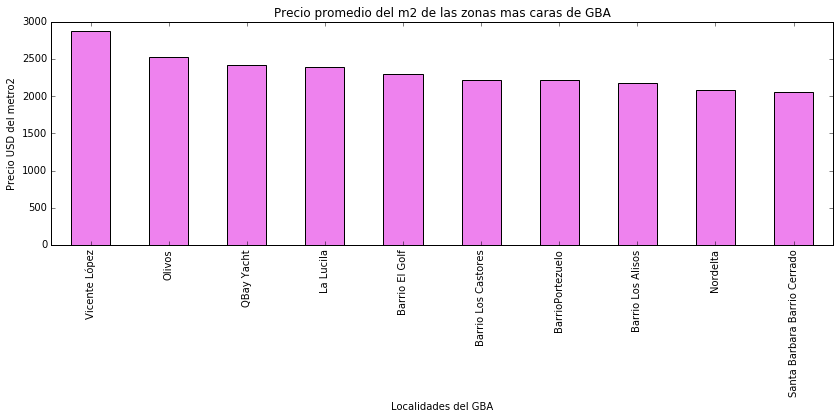

In [247]:
%matplotlib inline

ax = sells_gba_por_ciudades_y_m2['price_usd_per_m2','precio_del_m2_por_barrio'][:10].plot(title = "Precio promedio del m2 de las zonas mas caras de GBA",color = 'violet',kind='bar',figsize=(14,4))
ax.set_ylabel('Precio USD del metro2')
ax.set_xlabel('Localidades del GBA')
plt.show()

In [249]:
#Precio promedio del m2 por barrio en CABA ordenado de mayor a menor
sells_caba_por_ciudades_y_m2 = sells_caba.loc[:,['place_name','price_usd_per_m2']]
sells_caba_por_ciudades_y_m2 = sells_caba_por_ciudades_y_m2[sells_caba_por_ciudades_y_m2['price_usd_per_m2'] < 7000]
sells_caba_por_ciudades_y_m2 = sells_caba_por_ciudades_y_m2[np.isfinite(sells_caba_por_ciudades_y_m2['price_usd_per_m2'])]
sells_caba_por_ciudades_y_m2 = sells_caba_por_ciudades_y_m2.groupby('place_name').agg([np.mean,np.size])
sells_caba_por_ciudades_y_m2 = sells_caba_por_ciudades_y_m2.loc[sells_caba_por_ciudades_y_m2[('price_usd_per_m2','size')]>=10,:]
sells_caba_por_ciudades_y_m2 = sells_caba_por_ciudades_y_m2.rename(columns = {'mean': 'precio_del_m2_por_barrio'})
sells_caba_por_ciudades_y_m2 = sells_caba_por_ciudades_y_m2.sort_values(('price_usd_per_m2','precio_del_m2_por_barrio'), ascending=False)
sells_caba_por_ciudades_y_m2.head(10)

price_usd_per_m2      
                  precio_del_m2_por_barrio  size
place_name                                      
Puerto Madero                  5429.699799   423
Palermo Chico                  4337.862080   106
Palermo Viejo                  3820.655057    29
Las Cañitas                    3523.013642   113
Palermo Soho                   3513.816380   112
Recoleta                       3236.307685   594
Palermo Hollywood              3143.341643   225
Palermo                        3116.368150  1044
Belgrano                       2928.512784   946
Barrio Norte                   2827.304496   645

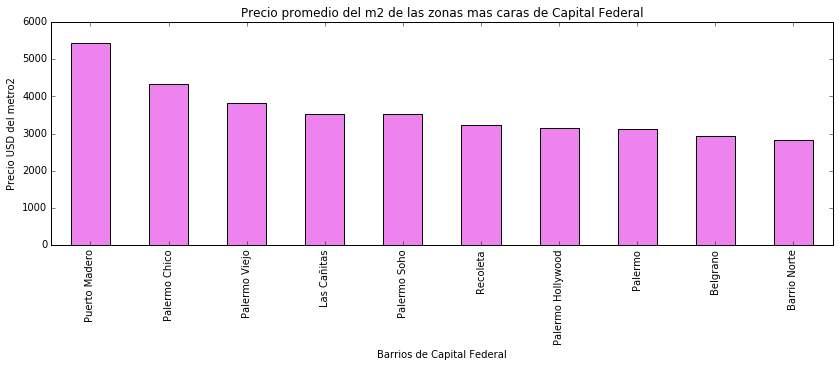

In [252]:
%matplotlib inline

ax = sells_caba_por_ciudades_y_m2['price_usd_per_m2','precio_del_m2_por_barrio'][:10].plot(title = "Precio promedio del m2 de las zonas mas caras de Capital Federal",kind='bar',color='violet',figsize=(14,4))
ax.set_ylabel('Precio USD del metro2')

ax.set_xlabel('Barrios de Capital Federal')
plt.show()

In [30]:
sells.columns.values

array(['created_on', 'property_type', 'place_name', 'state_name', 'lat',
       'lon', 'price', 'currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'rooms', 'expenses', 'properati_url'], dtype=object)

In [254]:
#CON ESTO SACO EL VALOR DEL DOLAR, CON CADA DATA SET DE 6 MESES, puedo obtener un dolar que irá creciendo y se puede
#almacenar en algun plot del estilo area, en donde se vea la curva de crecimiento en la que seguramente se vera .
sells_caba_with_price_currency_ars = sells_caba[sells_caba['currency'] == 'ARS']
sells_caba_with_price_currency_ars = sells_caba_with_price_currency_ars.loc[:,['price','price_aprox_usd']]
sells_caba_with_price_currency_ars['price'].sum()/sells_caba_with_price_currency_ars['price_aprox_usd'].sum()


15.75068881663854

### Valor del dólar durante el transcurso del mes Enero del 2017

###### Se inicia un análisis de las propiedades que se encuentran pesificadas, ya que cuentan con su valor tanto en pesos y en dolar.

In [183]:
#Me quedo con los valores que esten pesificados, ya que con ellos puedo trabajar para obtener el valor del dolar.

only_sells_with_price_arg = sells_caba[sells_caba['currency'] == 'ARS']
only_sells_with_price_arg = only_sells_with_price_arg [(only_sells_with_price_arg['created_on']>'2017-01-01') & (only_sells_with_price_arg['created_on']<'2017-01-31')]
#only_sells_with_price_arg = only_sells_with_price_arg [(only_sells_with_price_arg['created_on']>='2017-01-01') & (only_sells_with_price_arg['created_on']<='2017-01-31')]
#(arriba) esto con la restricciones de filtrado, lo debo quitar.
sells_caba_with_date = only_sells_with_price_arg.loc[:,['created_on','price','price_aprox_usd']]

#Con un valor de una propiedad por día puedo sacar el valor del dolar del mismo día.
sells_caba_with_date = sells_caba_with_date.drop_duplicates(['created_on'], keep='last')
sells_caba_with_date['created_on'] = sells_caba_with_date['created_on'].astype("datetime64")
sells_caba_with_date = sells_caba_with_date.sort_values(('created_on'), ascending=True)

#Agrego una columna donde voy a calcular el dolar del día.
sells_caba_with_date['dollar'] = sells_caba_with_date['price']/sells_caba_with_date['price_aprox_usd']
sells_caba_with_date = sells_caba_with_date.round({'dollar':2})
sells_caba_with_date.set_index('created_on', inplace=True)

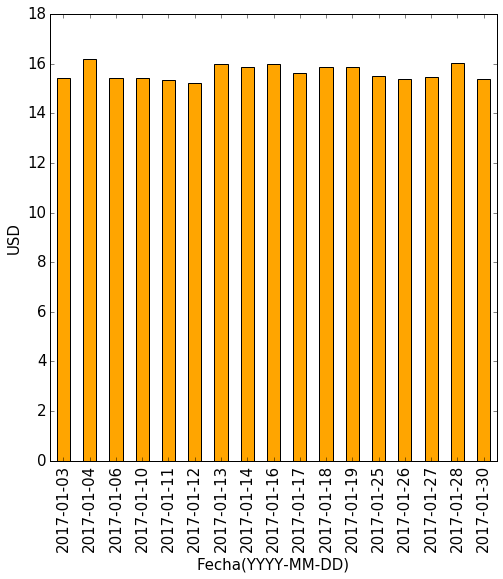

In [184]:

bar = sells_caba_with_date['dollar'].plot.bar(figsize=(8,8), fontsize=15,color = 'orange',stacked=True)
bar.set_xticklabels(sells_caba_with_date.index.format()) # formato YYYY-MM-DD
bar.set_xlabel('Fecha(YYYY-MM-DD)', fontsize=15)
bar.set_ylabel('USD',fontsize = 15)
 
plt.show()

Con este plot se puede ver claramente que durante el mes de Enero del 2017, el precio del dolar se mantuvo estable, por lo que se puede decir que en el mercado de las propiedades, el valor de las mismas no vario mucho con respecto a las anteriores.